## Importing necessary libraries

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

## Loading the dataset

In [81]:
games = pd.read_excel("/Users/bene/Downloads/metacritic.xlsx")

In [82]:
games.head()

,game,platform,developer,genre,rating,release_date,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score
0,"Harry Potter and the Deathly Hallows, Part 2",PC,NaN,Action,T,2011-07-12,1,1,10,8,0,8,43,46
1,Cannon Fodder 3,PC,NaN,Strategy,NaN,2012-02-09,1,6,3,0,1,1,49,57
2,Seduce Me,PC,NaN,Strategy,AO,2013-01-02,0,5,7,2,0,4,41,34
3,Out of the Park Baseball 15,PC,NaN,Sports,NaN,2014-04-21,8,0,0,14,0,1,89,72
4,Outlast: Whistleblower,PC,NaN,Action Adventure,M,2014-05-06,6,6,0,20,5,3,73,79


## Data cleaning

In [83]:
games.isna().sum()

game                   0
platform               0
developer             14
genre                  5
rating              1266
release_date           0
positive_critics       0
neutral_critics        0
negative_critics       0
positive_users         0
neutral_users          0
negative_users         0
metascore              0
user_score             0
dtype: int64

In [84]:
games.drop(columns=["rating"], inplace=True)

In [85]:
games[games["developer"].isna()]

,game,platform,developer,genre,release_date,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score
0,"Harry Potter and the Deathly Hallows, Part 2",PC,NaN,Action,2011-07-12,1,1,10,8,0,8,43,46
1,Cannon Fodder 3,PC,NaN,Strategy,2012-02-09,1,6,3,0,1,1,49,57
2,Seduce Me,PC,NaN,Strategy,2013-01-02,0,5,7,2,0,4,41,34
3,Out of the Park Baseball 15,PC,NaN,Sports,2014-04-21,8,0,0,14,0,1,89,72
4,Outlast: Whistleblower,PC,NaN,Action Adventure,2014-05-06,6,6,0,20,5,3,73,79
5,Dead Nation,VITA,NaN,Action,2014-04-15,6,8,0,4,1,4,68,79
6,Memento Mori 2,PC,NaN,NaN,2014-05-13,0,0,0,0,0,0,65,75
7,Dead Rising 3: Operation Broken Eagle,XONE,NaN,Action,2014-01-21,1,12,3,2,4,5,52,42
8,Destiny: The Taken King,PS4,NaN,NaN,2015-09-15,0,0,0,0,0,0,86,62
9,3D Fantasy Zone II W,3DS,NaN,NaN,2015-04-16,0,0,0,0,0,0,81,70


#### Dropping rows with no developers and genres

In [86]:
games.drop(labels=[n for n in range(0, 14)], inplace=True)

## EDA

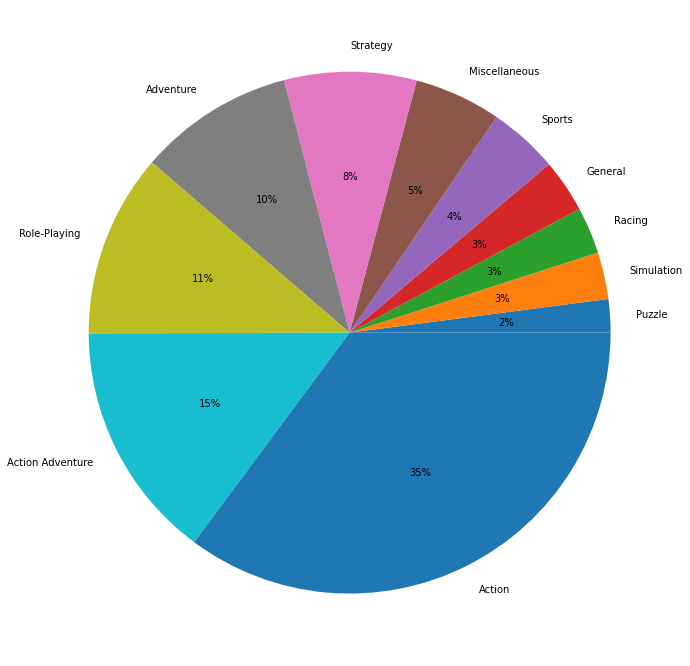

In [87]:
#count occurences of each genre and platform
genres = games['genre'].value_counts().sort_values(ascending=True)
platforms = games['platform'].value_counts().sort_values(ascending=True)

#filter out genres with less than 100 occurences and group them in an "Other category" ("Misc" has 282)
large_genres = genres[genres > 100] 

#display data
plt.figure(figsize=[12, 12])
plt.pie(large_genres.values, labels=large_genres.index, autopct='%1.0f%%')
plt.show()


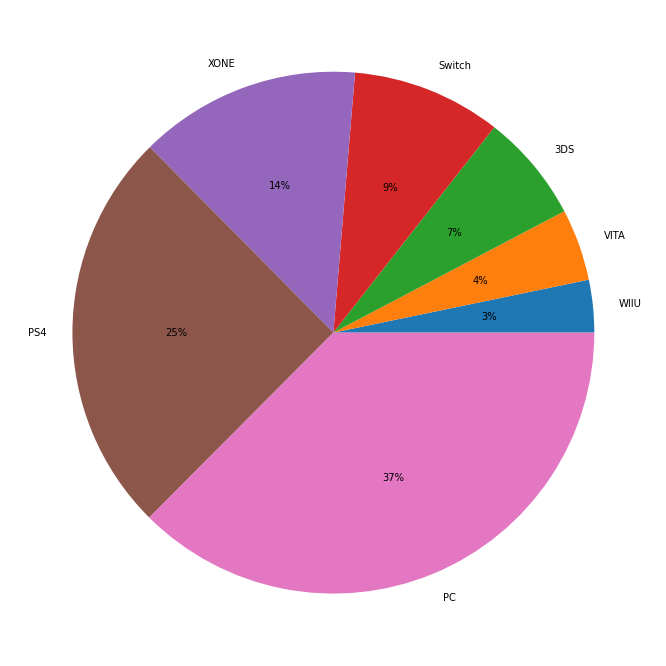

In [88]:
plt.figure(figsize=[12, 12])
plt.pie(platforms.values, labels=platforms.index, autopct='%1.0f%%')
plt.show()

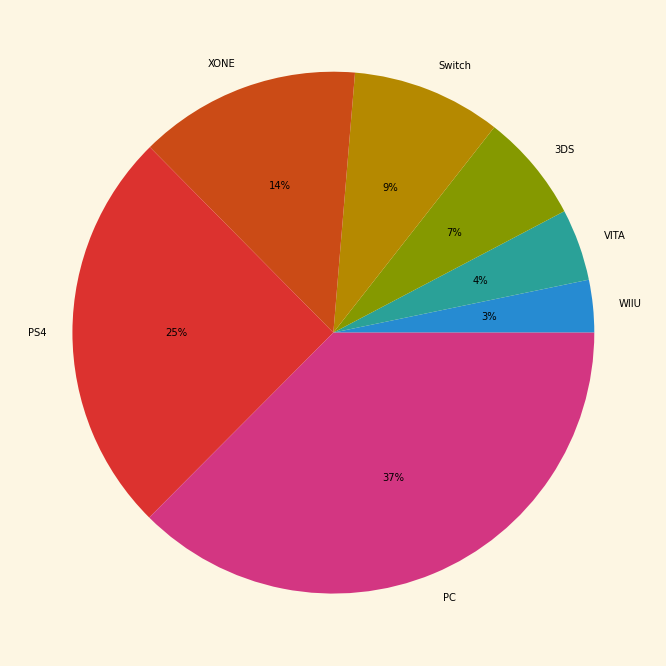

In [89]:
with plt.style.context('Solarize_Light2'):
    plt.figure(figsize=[12, 12])
    plt.pie(platforms.values, labels=platforms.index, autopct='%1.0f%%')
plt.show()

In [90]:
developers = games.groupby('developer')[['metascore', 'user_score']].agg("mean")
top_developers = developers.sort_values(["metascore", "user_score"], ascending=False)[:10]
top_developers

,metascore,user_score
developer,,
Rockstar North,96.666667,79.333333
SCE Santa Monica,94.000000,91.000000
"Kojima Productions, Moby Dick Studio",94.000000,78.000000
"Nintendo, HAL Labs, Bandai Namco Games, Sora Ltd.",93.000000,86.000000
tobyfox,92.333333,74.666667
Tricky Pixels,92.000000,84.000000
Rockstar Games,92.000000,73.666667
"Bluepoint Games, SCE Japan Studio",91.000000,78.000000
Capcom R&D Division 1,90.666667,87.000000


<AxesSubplot:ylabel='developer'>

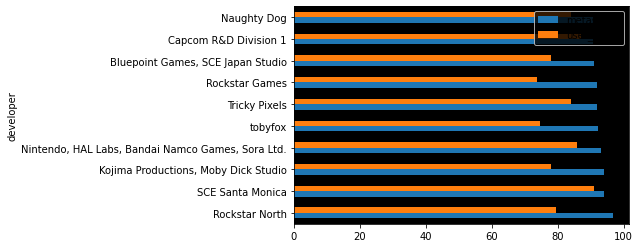

In [91]:
#plt.rcParams['figure.facecolor'] = 'white'
fig.patch.set_facecolor('white')
top_developers.plot.barh()

<AxesSubplot:ylabel='developer'>

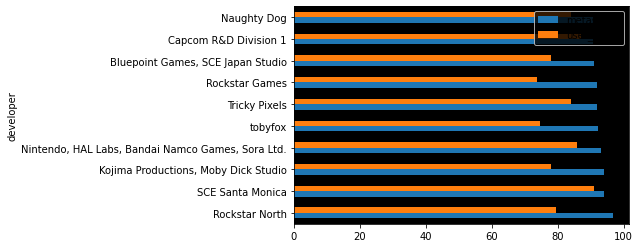

In [92]:
top_developers.plot.barh()

## Data preprocessing

#### Looking to filter on developers

In [93]:
# Creating a dataframe gruped by developers and their respective count of games
game_dev_count = games[["developer", "game"]].groupby(["developer"], as_index=False).agg("count")

# Limiting that dataframe to only those developers who have 20+ games
dev_shortlist = game_dev_count.sort_values(by="game", ascending=False)[:26]

# Storing that into a list
dev_list = dev_shortlist["developer"].to_list()

# Finally, storing the result in a clean dataset
games_clean = games[games["developer"].isin(dev_list)]

In [94]:
dev_list = dev_shortlist["developer"].to_list()
dev_list

['Telltale Games',
 'Capcom',
 'Nintendo',
 'Ubisoft Montreal',
 'TT Games',
 'Bandai Namco Games',
 'EA Sports',
 'Square Enix',
 'Codemasters',
 'Omega Force',
 'Ubisoft',
 'Konami',
 'DONTNOD Entertainment',
 'Zen Studios',
 'Arc System Works',
 'Blizzard Entertainment',
 'Daedalic Entertainment',
 'Double Fine Productions',
 'EA DICE',
 'Level 5',
 'From Software',
 'Milestone S.r.l',
 'Nippon Ichi Software',
 'Sega',
 'WayForward',
 'Falcom']

#### Creating a dataframe with only the developers with 20+ games

In [95]:
games_clean = games[games["developer"].isin(dev_list)]
games_clean.shape

(975, 13)

In [96]:
df = games_clean[["metascore", "release_date"]]


In [97]:
df["ds"] = df["release_date"]
df["y"] = df["metascore"]
df.drop(columns=["release_date", "metascore"], inplace=True)

df

/var/folders/zk/q8xgx55x0mbfk7s169n1t4lw0000gn/T/ipykernel_813/3447488375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ds"] = df["release_date"]
/var/folders/zk/q8xgx55x0mbfk7s169n1t4lw0000gn/T/ipykernel_813/3447488375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y"] = df["metascore"]
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the

,ds,y
254,2011-05-31,64
255,2012-02-14,83
256,2014-12-16,84
257,2014-06-17,67
258,2015-06-30,80
...,...,...
5661,2017-08-01,72
5662,2017-08-03,66
5663,2018-04-04,80
5664,2018-08-16,77


In [98]:
df

,ds,y
254,2011-05-31,64
255,2012-02-14,83
256,2014-12-16,84
257,2014-06-17,67
258,2015-06-30,80
...,...,...
5661,2017-08-01,72
5662,2017-08-03,66
5663,2018-04-04,80
5664,2018-08-16,77


In [99]:
from prophet import Prophet

m = Prophet()

In [100]:
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -10.479


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      58       1803.89   0.000617899       110.215   1.046e-05       0.001      106  LS failed, Hessian reset 
      99       1804.06   0.000583545       70.8813      0.3433           1      153   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     172       1804.13   4.06839e-05       63.5028   7.601e-07       0.001      295  LS failed, Hessian reset 
     199       1804.13   3.90261e-05        85.788           1           1      328   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1804.19   0.000119462       46.8418       0.573       0.573      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     322        1804.2   5.11852e-05       58.1219   7.863e-07       0.001      536  LS failed, Hessian reset 
     377       1804.22   4.72442e-08  

In [101]:
games_clean.isna().sum()

game                0
platform            0
developer           0
genre               0
release_date        0
positive_critics    0
neutral_critics     0
negative_critics    0
positive_users      0
neutral_users       0
negative_users      0
metascore           0
user_score          0
dtype: int64

#### Adding in release_month and release_year column

In [102]:
games_clean["release_month"] = games_clean["release_date"].dt.month
games_clean["release_year"] = games_clean["release_date"].dt.year
games_clean

/var/folders/zk/q8xgx55x0mbfk7s169n1t4lw0000gn/T/ipykernel_813/180073220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_clean["release_month"] = games_clean["release_date"].dt.month
/var/folders/zk/q8xgx55x0mbfk7s169n1t4lw0000gn/T/ipykernel_813/180073220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_clean["release_year"] = games_clean["release_date"].dt.year


,game,platform,developer,genre,release_date,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score,release_month,release_year
254,BlazBlue: Continuum Shift II,3DS,Arc System Works,Action,2011-05-31,3,9,2,3,1,1,64,62,5,2011
255,BlazBlue: Continuum Shift Extend,VITA,Arc System Works,Action,2012-02-14,26,2,0,11,2,0,83,75,2,2012
256,Guilty Gear Xrd -SIGN-,PS4,Arc System Works,Action,2014-12-16,29,4,0,17,1,0,84,79,12,2014
257,Magical Beat,VITA,Arc System Works,Action,2014-06-17,1,8,0,0,0,0,67,63,6,2014
258,BlazBlue: Chrono Phantasma Extend,PS4,Arc System Works,Action,2015-06-30,9,0,1,5,1,0,80,76,6,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5661,CastleStorm: Virtual Reality,PS4,Zen Studios,Strategy,2017-08-01,5,6,0,0,0,1,72,38,8,2017
5662,Infinite Minigolf,Switch,Zen Studios,Sports,2017-08-03,2,5,0,2,3,4,66,58,8,2017
5663,Pinball FX3: Bethesda Pinball,Switch,Zen Studios,Action,2018-04-04,6,2,0,0,0,0,80,76,4,2018
5664,CastleStorm,Switch,Zen Studios,Strategy,2018-08-16,7,2,0,0,0,0,77,78,8,2018


#### Correlation heatmap

<AxesSubplot:>

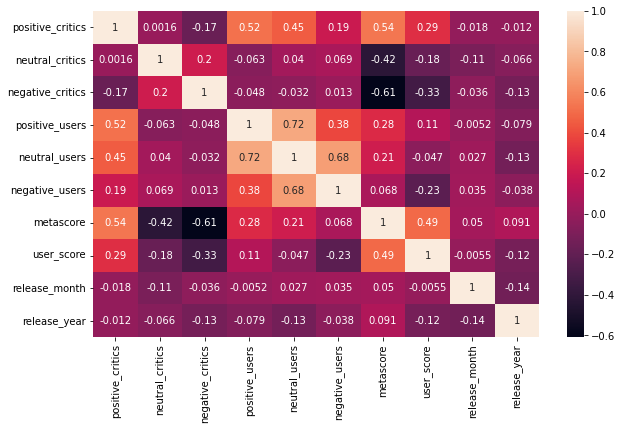

In [103]:
plt.figure(figsize=[10, 6])
sns.heatmap(games_clean.corr(), annot=True)

#### Time-series user score forecast

In [104]:
release_date_score = games[["release_date", "metascore"]].groupby(["release_date"]).agg("mean")
release_date_score

,metascore
release_date,
2011-01-03,56.000000
2011-01-11,72.000000
2011-01-13,79.000000
2011-01-23,75.000000
2011-01-24,82.000000
...,...
2019-03-20,71.000000
2019-03-21,74.000000
2019-03-22,88.750000


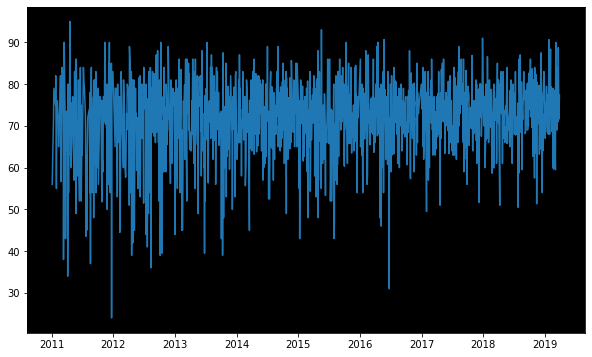

In [105]:
plt.figure(figsize=[10, 6])
x = release_date_score.index
y = np.array(release_date_score["metascore"])
plt.plot(x, y)

In [106]:
from pmdarima.arima import auto_arima

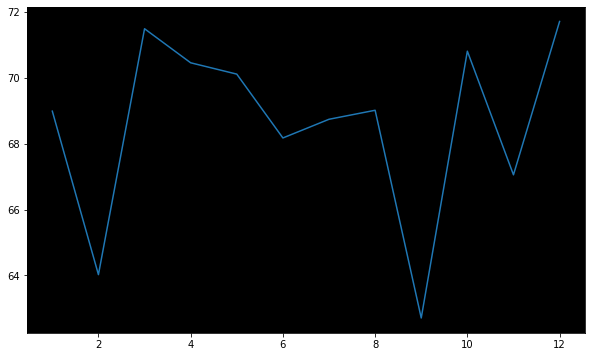

In [107]:
release_score = games_clean[["release_month", "user_score"]].groupby(["release_month"], as_index=False).agg("mean")

plt.figure(figsize=[10, 6])
x = release_score["release_month"]
y = np.array(release_score["user_score"])
plt.plot(x, y)

In [108]:
release_date_score['release_date'] = release_date_score.index

#### Time-series meta-score forecast

In [110]:
release_date_score = games[["release_date", "metascore"]].groupby(["release_date"]).agg("mean")
release_date_score

,metascore
release_date,
2011-01-03,56.000000
2011-01-11,72.000000
2011-01-13,79.000000
2011-01-23,75.000000
2011-01-24,82.000000
...,...
2019-03-20,71.000000
2019-03-21,74.000000
2019-03-22,88.750000


In [111]:
from pmdarima.arima import auto_arima

In [112]:
#### Auto-arima
train = release_date_score.head(int(len(release_date_score)*(80/100)))
test = release_date_score.tail(int(len(release_date_score)*(20/100)))

train

,metascore
release_date,
2011-01-03,56.000000
2011-01-11,72.000000
2011-01-13,79.000000
2011-01-23,75.000000
2011-01-24,82.000000
...,...
2017-08-22,75.909091
2017-08-24,86.000000
2017-08-25,79.333333


<AxesSubplot:xlabel='release_date'>

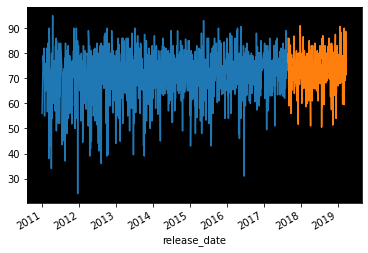

In [113]:
#plotting the data
train["metascore"].plot()
test["metascore"].plot()

In [114]:
test

,metascore
release_date,
2017-08-31,76.400000
2017-09-01,80.000000
2017-09-05,66.000000
2017-09-06,86.000000
2017-09-07,73.250000
...,...
2019-03-20,71.000000
2019-03-21,74.000000
2019-03-22,88.750000


In [115]:
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10152.741, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9843.198, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10150.743, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=9682.521, Time=0.17 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=9590.081, Time=0.24 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=9544.070, Time=0.32 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=9486.615, Time=0.33 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.45 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.54 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=9484.622, Time=0.10 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=9542.077, Time=0.08 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=0.43 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=inf, Time=0.39

ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [116]:

forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])
forecast



,Prediction
release_date,
2017-08-31,78.343498
2017-09-01,78.881272
2017-09-05,79.861708
2017-09-06,78.468995
2017-09-07,78.345335
...,...
2019-03-20,78.573265
2019-03-21,78.573265
2019-03-22,78.573265


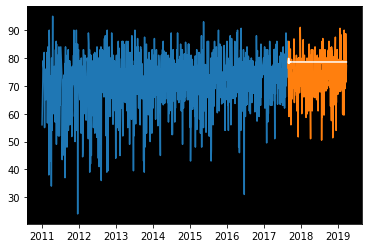

In [117]:
#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Valid')
plt.plot(forecast, label='Prediction', color="white")
plt.show()

In [118]:
pip install pystan==2.19.1.1

Note: you may need to restart the kernel to use updated packages.


In [119]:
pip install prophet --user

Note: you may need to restart the kernel to use updated packages.


In [120]:
import pandas as pd
from prophet import Prophet


In [121]:
release_date_score['ds'] = release_date_score.index


In [122]:
release_date_score = release_date_score.rename(columns = {'metascore':'y'})

In [123]:
release_date_score

,y,ds
release_date,,
2011-01-03,56.000000,2011-01-03
2011-01-11,72.000000,2011-01-11
2011-01-13,79.000000,2011-01-13
2011-01-23,75.000000,2011-01-23
2011-01-24,82.000000,2011-01-24
...,...,...
2019-03-20,71.000000,2019-03-20
2019-03-21,74.000000,2019-03-21
2019-03-22,88.750000,2019-03-22


In [124]:
release_date_score = release_date_score.rename(columns = {'release_date':'ds'})
release_date_score

,y,ds
release_date,,
2011-01-03,56.000000,2011-01-03
2011-01-11,72.000000,2011-01-11
2011-01-13,79.000000,2011-01-13
2011-01-23,75.000000,2011-01-23
2011-01-24,82.000000,2011-01-24
...,...,...
2019-03-20,71.000000,2019-03-20
2019-03-21,74.000000,2019-03-21
2019-03-22,88.750000,2019-03-22


In [127]:
release_date_score = release_date_score.rename(columns = {'metascore':'Y'})
release_date_score["DS"] = release_date_score.index
# release_date_score["Y"] = release_date_score["y"]
# release_date_score.drop(columns=["y", "DS"], inplace=True)
# release_date_score.drop(columns=["ds"], inplace=True)
#release_date_score["ds"] = release_date_score["DS"]
#release_date_score["y"] = release_date_score["Y"]
#release_date_score.drop(columns=["Y", "DS"], inplace=True)
release_date_score.drop(columns=["DS"], inplace=True)

In [128]:
m = Prophet(weekly_seasonality=True)
m.fit(release_date_score)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -12.5011


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3034.98   0.000148221       84.2551      0.5387      0.5387      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     161       3035.14    0.00210737       203.069   1.359e-05       0.001      247  LS failed, Hessian reset 
     197       3035.28    2.0138e-05       87.4468   2.146e-07       0.001      331  LS failed, Hessian reset 
     199       3035.28     3.186e-06       80.9214      0.4652      0.4652      333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     230       3035.28   2.27705e-07       88.0737      0.3761           1      374   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [129]:
future = release_date_score.tail(int(len(release_date_score)*(20/100)))

In [130]:
forecast = m.predict(future)

In [131]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2017-08-31,76.051464,64.053491,88.003436
1,2017-09-01,74.063475,63.389407,84.939747
2,2017-09-05,75.760778,65.133552,87.524284
3,2017-09-06,75.078607,63.774259,86.222663
4,2017-09-07,76.246109,66.334429,87.127855
...,...,...,...,...
314,2019-03-20,73.083639,62.057267,84.295796
315,2019-03-21,74.152938,63.442859,85.049776
316,2019-03-22,72.028608,60.733801,82.795142
317,2019-03-26,73.556450,62.085970,85.098995


In [134]:
release_date_score.tail(int(len(release_date_score)*(20/100)))

,y,ds
release_date,,
2017-08-31,76.400000,2017-08-31
2017-09-01,80.000000,2017-09-01
2017-09-05,66.000000,2017-09-05
2017-09-06,86.000000,2017-09-06
2017-09-07,73.250000,2017-09-07
...,...,...
2019-03-20,71.000000,2019-03-20
2019-03-21,74.000000,2019-03-21
2019-03-22,88.750000,2019-03-22


In [135]:
forecast.index = forecast.ds

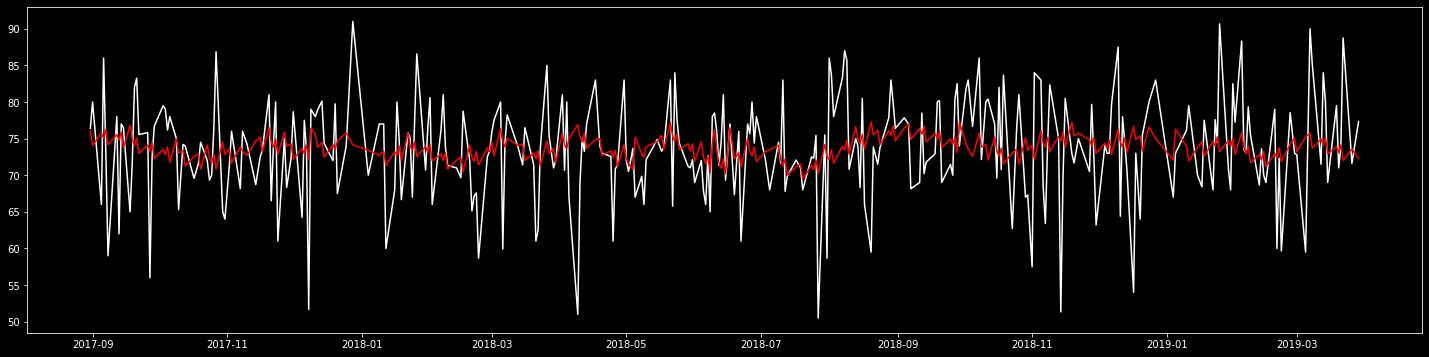

In [136]:
results = pd.DataFrame()
results["actual"] = release_date_score.tail(int(len(release_date_score)*(20/100)))["y"]
results["prediction"] = forecast["yhat"]

with plt.style.context('dark_background'):
    plt.figure(figsize=(25, 6))
    plt.plot(results.index, results.actual, color="white")
    plt.plot(results.index, results.prediction, color="red")

#### Encoding

In [137]:
# I create a new dataset with the datetime dropped, and separate year and month columns instead
# games_clean.drop(columns=["release_date"], inplace=True)
games_clean

,game,platform,developer,genre,release_date,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score,release_month,release_year
254,BlazBlue: Continuum Shift II,3DS,Arc System Works,Action,2011-05-31,3,9,2,3,1,1,64,62,5,2011
255,BlazBlue: Continuum Shift Extend,VITA,Arc System Works,Action,2012-02-14,26,2,0,11,2,0,83,75,2,2012
256,Guilty Gear Xrd -SIGN-,PS4,Arc System Works,Action,2014-12-16,29,4,0,17,1,0,84,79,12,2014
257,Magical Beat,VITA,Arc System Works,Action,2014-06-17,1,8,0,0,0,0,67,63,6,2014
258,BlazBlue: Chrono Phantasma Extend,PS4,Arc System Works,Action,2015-06-30,9,0,1,5,1,0,80,76,6,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5661,CastleStorm: Virtual Reality,PS4,Zen Studios,Strategy,2017-08-01,5,6,0,0,0,1,72,38,8,2017
5662,Infinite Minigolf,Switch,Zen Studios,Sports,2017-08-03,2,5,0,2,3,4,66,58,8,2017
5663,Pinball FX3: Bethesda Pinball,Switch,Zen Studios,Action,2018-04-04,6,2,0,0,0,0,80,76,4,2018
5664,CastleStorm,Switch,Zen Studios,Strategy,2018-08-16,7,2,0,0,0,0,77,78,8,2018


In [138]:
from sklearn import preprocessing
games_new = games_clean.apply(preprocessing.LabelEncoder().fit_transform)
games_new

,game,platform,developer,genre,release_date,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score,release_month,release_year
254,68,0,0,1,10,3,9,2,3,1,1,29,47,4,0
255,67,4,0,1,34,26,2,0,11,2,0,48,60,1,1
256,209,2,0,1,187,29,4,0,17,1,0,49,64,11,3
257,293,4,0,1,154,1,8,0,0,0,0,32,48,5,3
258,66,2,0,1,225,9,0,1,5,1,0,45,61,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5661,81,2,25,30,367,5,6,0,0,0,1,37,23,7,6
5662,241,3,25,29,369,2,5,0,2,3,4,31,43,7,6
5663,388,3,25,1,423,6,2,0,0,0,0,45,61,3,7
5664,79,3,25,30,452,7,2,0,0,0,0,42,63,7,7


In [139]:

games_new["metascore_bins"] = pd.cut(x=games_new["metascore"], labels=[1, 2, 3, 4, 5], bins = 5) #right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)
games_new["metascore_bins"].value_counts()

4    522
3    228
5    161
2     49
1     15
Name: metascore_bins, dtype: int64

#### Splitting the data

In [141]:
games_new["metascore_bins"].value_counts()

4    522
3    228
5    161
2     49
1     15
Name: metascore_bins, dtype: int64

In [142]:
from sklearn.model_selection import train_test_split

x = games_new.drop(columns=["metascore", "user_score", "metascore_bins"])
y = games_new["metascore_bins"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#### Using tpot classifier to determine best pipeline

In [143]:
from tpot import TPOTClassifier

tpot = TPOTClassifier(verbosity=2, max_time_mins=5)
tpot.fit(x_train, y_train)
print(tpot.score(x_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


                                                                              
Generation 1 - Current best internal CV score: 0.8192307692307693
                                                                              
Generation 2 - Current best internal CV score: 0.8294871794871794
                                                                              
5.14 minutes have elapsed. TPOT will close down.                              
TPOT closed during evaluation in one generation.
                                                                              
                                                                              
TPOT closed prematurely. Will use the current best pipeline.
                                                                              
Best pipeline: MLPClassifier(Normalizer(RFE(input_matrix, criterion=gini, max_features=0.45, n_estimators=100, step=0.8500000000000001), norm=max), alpha=0.001, learning_rate_init=0.1)
0.8307692307692308


In [144]:
from sklearn.ensemble import ExtraTreesClassifier

In [145]:
etc = ExtraTreesClassifier(bootstrap=False, criterion="gini", max_features=0.9000000000000001, class_weight="balanced", min_samples_leaf=5, min_samples_split=3, n_estimators=100)

In [146]:
etc.fit(x_train, y_train)

ExtraTreesClassifier(class_weight='balanced', max_features=0.9000000000000001,
                     min_samples_leaf=5, min_samples_split=3)

In [147]:
y_pred = etc.predict(x_test)
y_pred

array([3, 2, 4, 4, 3, 4, 4, 5, 4, 2, 4, 4, 5, 3, 3, 4, 2, 2, 2, 5, 5, 3,
       3, 3, 4, 3, 4, 3, 2, 5, 4, 4, 5, 4, 4, 5, 4, 4, 4, 4, 5, 5, 5, 5,
       4, 5, 4, 4, 4, 5, 3, 4, 4, 5, 4, 4, 4, 3, 4, 4, 4, 3, 1, 5, 4, 3,
       5, 5, 3, 4, 5, 3, 1, 4, 3, 4, 5, 4, 3, 3, 4, 3, 4, 4, 4, 5, 5, 4,
       2, 3, 3, 3, 4, 3, 5, 5, 3, 3, 4, 5, 5, 4, 4, 4, 5, 2, 4, 3, 4, 2,
       3, 3, 4, 4, 3, 5, 4, 4, 5, 4, 3, 3, 4, 5, 5, 5, 2, 4, 3, 3, 5, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 3, 4, 4, 3, 4, 1, 4, 3, 4, 4, 5, 5, 4,
       4, 4, 2, 4, 4, 4, 5, 5, 3, 4, 3, 5, 4, 4, 3, 4, 5, 5, 5, 5, 5, 3,
       4, 3, 4, 4, 5, 4, 4, 5, 4, 4, 5, 4, 3, 3, 3, 5, 3, 3, 3])

In [148]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


The classification report for Extra Trees Classifier is:
              precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       0.73      0.80      0.76        10
           3       0.70      0.85      0.77        39
           4       0.94      0.76      0.84       108
           5       0.72      0.94      0.82        36

    accuracy                           0.82       195
   macro avg       0.75      0.87      0.80       195
weighted avg       0.84      0.82      0.82       195



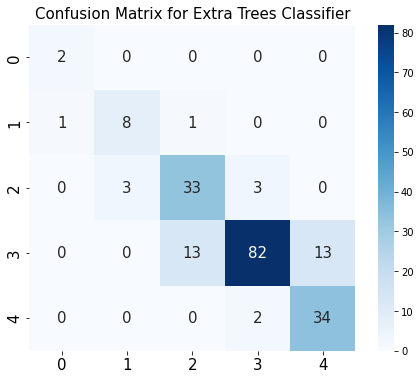

In [149]:
generate_results(etc, y_pred, 'Extra Trees Classifier')

#### Under-sampling using NearMiss

In [150]:
from imblearn.under_sampling import NearMiss
undersample = NearMiss()
x_nm, y_nm = undersample.fit_resample(x, y)

In [151]:
x_train_nm, x_test_nm, y_train_nm, y_test_nm = train_test_split(x_nm, y_nm, test_size=0.2)

In [152]:
etc_nm = ExtraTreesClassifier(bootstrap=False, criterion="gini", max_features=0.9000000000000001, class_weight="balanced", min_samples_leaf=5, min_samples_split=3, n_estimators=100)

In [153]:
etc_nm.fit(x_train_nm, y_train_nm)

ExtraTreesClassifier(class_weight='balanced', max_features=0.9000000000000001,
                     min_samples_leaf=5, min_samples_split=3)

In [154]:
y_pred_nm = etc_nm.predict(x_test_nm)
y_pred_nm

array([5, 1, 3, 4, 5, 3, 2, 2, 4, 3, 1, 3, 2, 1, 1])

In [155]:
cl_rep_nm = classification_report(y_test_nm, y_pred_nm)
cl_rep_nm

'              precision    recall  f1-score   support\n\n           1       0.75      0.75      0.75         4\n           2       0.33      0.33      0.33         3\n           3       0.75      0.75      0.75         4\n           4       1.00      1.00      1.00         2\n           5       1.00      1.00      1.00         2\n\n    accuracy                           0.73        15\n   macro avg       0.77      0.77      0.77        15\nweighted avg       0.73      0.73      0.73        15\n'

In [156]:
cm_model_nm = confusion_matrix(y_test_nm, y_pred_nm)
cm_model_nm

array([[3, 1, 0, 0, 0],
       [1, 1, 1, 0, 0],
       [0, 1, 3, 0, 0],
       [0, 0, 0, 2, 0],
       [0, 0, 0, 0, 2]])

In [157]:
print("\nThe classification report for " + "Extra Trees Classifier with under-sampling" + " is:", cl_rep_nm, sep = "\n")


The classification report for Extra Trees Classifier with under-sampling is:
              precision    recall  f1-score   support

           1       0.75      0.75      0.75         4
           2       0.33      0.33      0.33         3
           3       0.75      0.75      0.75         4
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2

    accuracy                           0.73        15
   macro avg       0.77      0.77      0.77        15
weighted avg       0.73      0.73      0.73        15



#### Over-sampling using SMOTE

In [158]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_sm, y_sm = oversample.fit_resample(x, y)

In [159]:
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_sm, y_sm, test_size= 0.2)

In [160]:
etc_sm = ExtraTreesClassifier(bootstrap=False, criterion="gini", max_features=0.9000000000000001, class_weight="balanced", min_samples_leaf=5, min_samples_split=3, n_estimators=100)
etc_sm.fit(x_train_sm, y_train_sm)
y_pred_sm = etc_sm.predict(x_test_sm)

In [161]:
cl_rep_sm = classification_report(y_test_sm, y_pred_sm)
cl_rep_sm

'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00       109\n           2       0.99      0.99      0.99       100\n           3       0.90      0.95      0.92        97\n           4       0.93      0.87      0.90       106\n           5       0.96      0.97      0.96       110\n\n    accuracy                           0.96       522\n   macro avg       0.96      0.96      0.96       522\nweighted avg       0.96      0.96      0.96       522\n'

In [162]:
cm_model_sm = confusion_matrix(y_test_sm, y_pred_sm)
cm_model_sm

array([[109,   0,   0,   0,   0],
       [  0,  99,   1,   0,   0],
       [  0,   1,  92,   4,   0],
       [  0,   0,   9,  92,   5],
       [  0,   0,   0,   3, 107]])

In [163]:
print("\nThe classification report for " + "Extra Trees Classifier with over-sampling" + " is:", cl_rep_sm, sep = "\n")


The classification report for Extra Trees Classifier with over-sampling is:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       109
           2       0.99      0.99      0.99       100
           3       0.90      0.95      0.92        97
           4       0.93      0.87      0.90       106
           5       0.96      0.97      0.96       110

    accuracy                           0.96       522
   macro avg       0.96      0.96      0.96       522
weighted avg       0.96      0.96      0.96       522



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


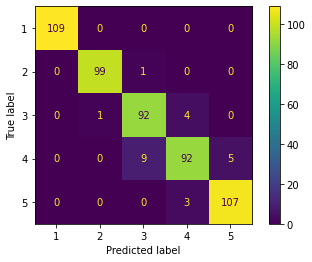

In [164]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(etc_sm, x_test_sm, y_test_sm)  
plt.show()
